**이진분류에서 정확도(Accuracy)는 신뢰성이 낮아서 잘 쓰지 않는다.**

* Accuracy대신 Confusion matrix, Precision, Recall, f1 score, ROC curve, AUC score를 사용합니다.
* 타이타닉 생존자 예측 데이터는 생존과 사망을 분류하는 이진분류입니다.
* titanic 데이터를 이용해 이진분류 평가지표를 실습해봅니다.

# 타이타닉 데이터를 전처리해주는 타이타닉 맞춤 전처리 함수를 생성합니다.

In [1]:
import sklearn
import pandas as pd
import numpy as np

## 타이나틱 데이터 전용 결측치 처리 함수를 생성합니다.

In [2]:
# 타이나틱 데이터 전용 결측치 처리 함수를 생성합니다.

def t_fillna(t_df):
    t_df['Age'].fillna(t_df['Age'].mean(),inplace=True)  # 나이컬럼의 결측치는 승객 나이 평균을 대입합니다.
    t_df['Cabin'].fillna('N', inplace=True)   # Cabin 컬럼의 결측치는 N을 채워넣습니다.
    t_df['Embarked'].fillna('N', inplace=True)  # Embarked 컬럼의 결측치는 N을 채워넣습니다.
    t_df['Fare'].fillna(0, inplace=True)  # Fare 칼럼의 결측치는 0을 채워넣습니다.
    return t_df

## 타이타닉 데이터 맞춤 불필요하 피처 제거 함수를 생성합니다.

In [3]:
# 타이타닉 데이터 맞춤 불필요하 피처 제거 함수를 생성합니다.
# 'PassengerId','Name','Ticket' 칼럼은 생존자 예측 분류에 도움이 되지 않습니다.

def t_drop_features(t_df):
    t_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return t_df

## 타이타닉 데이터 맞춤 레이블 인코딩을 수행하는 함수를 생성합니다.

In [4]:
# 타이타닉 데이터 맞춤 레이블 인코딩을 수행하는 함수를 생성합니다.
from sklearn.preprocessing import LabelEncoder

def t_format_features(t_df):
    t_df['Cabin'] = t_df['Cabin'].str[:1]  # Cabin 칼럼에서 문자뒤의 숫자를 모두 제거합니다.
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(t_df[feature])
        t_df[feature] = le.transform(t_df[feature])
    return t_df

## 위에서 만들어준 결측치 처리, 쓸데없는 칼럼 제거, 레이블 인코딩 수행 함수를 모두 하나의 함수에 담아줍니다.

In [5]:
# 위에서 만들어준 결측치 처리, 쓸데없는 칼럼 제거, 레이블 인코딩 수행 함수를 모두 하나의 함수에 담아줍니다.
# 타이타닉 데이서 맞춤 종합 전처리 함수인 titanic_preprocessing()를 생성합니다.

def titanic_preprocessing(t_df):
    t_df = t_fillna(t_df)
    t_df = t_drop_features(t_df)
    t_df = t_format_features(t_df)
    return t_df

 # 혼동행렬, 정밀도, 재현율을 동시에 계산하는 분류평가지표 함수를 생성합니다.

In [6]:
# 혼동행렬, 정확도, 정밀도 , 재현율을 한꺼번에 계산하는 함수 생성

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print("정확도: {0: 0.4f}, 정밀도: {1: 0.4f}, 재현율: {2: 0.4f}".format(accuracy, precision, recall))

# LogisticRegression로 타이타닉 데이터를 학습한 다음에 분류평가지표를 실습해봅니다.

In [7]:
# 학습데이터와 테스트 데이터를 분리하는 train_test_split를 가져옵니다. 
from sklearn.model_selection import train_test_split 

# 분류 중에서 LogisticRegression를 가져옵니다.
from sklearn.linear_model import LogisticRegression  

# 경고메세지를 무시합니다.
import warnings
warnings.filterwarnings('ignore')

# 타이타닉 데이터를 재로딩, 전치리, 학습/테스트 데이터 셋으로 분할합니다.
titanic_df = pd.read_csv("C:/Users/wkdgu/권철민 머신러닝/PerfectGuide-master/PerfectGuide-master/2장/titanic/train.csv")
y_titanic_df = titanic_df['Survived']   # Survived 칼럼이 target입니다.
X_titanic_df = titanic_df.drop('Survived', axis=1)   # Survived 을 제외한 나머지 칼럼이 feature 데이터 셋입니다.
X_titanic_df = titanic_preprocessing(X_titanic_df)   # feature 데이터 셋을 전처리 해줍니다.

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

Confusion Matrix
[[108  10]
 [ 14  47]]
정확도:  0.8659, 정밀도:  0.8246, 재현율:  0.7705


# 정밀도/재현율 trade-off를 살펴봅니다.

**일단 predict_proba()와 Binarizer에 대해 공부합니다.**

 ## predict_proba()

In [8]:
# predict_proba()는 2개의 값을 반환합니다.
# 앞은 이진분류일 때 0일 나올 확률, 뒤는 1이 나올 확률을 반환합니다.

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


## Binarizer

In [9]:
# Binarizer는 threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
# Binarizer에 들어가는 값은 2차원이 되어야 됨
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [10]:
pred_proba_1 = pred_proba[:,1]
pred_proba_1.shape

(179,)

## 분류 결정 임계값 0.5기반에서 Binarizer를 이용하여 예측값 반환

In [11]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출합니다.
# Binarizer에는 2차원 값만 들어갈 수 있어서 반환값을 2차원으로 바꿔줍니다.
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

# pred = lr_clf.predict(X_test)
# get_clf_eval(y_test , pred)
# 정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705

# 위의 pred했을 때의 값과 일치힘. pred의 분류결정 임계값이 0.5임을 알 수 있음

Confusion Matrix
[[108  10]
 [ 14  47]]
정확도:  0.8659, 정밀도:  0.8246, 재현율:  0.7705


## 분류결정 임계값 0.4기반에서 Binarizer를 이용하여 예측값 반환

In [12]:
custom_threshold_2 = 0.4

# pred_proba()는 두 개의 값을 반환합니다. 이진분류에서 첫번째 값은 0이 될 확률, 두번째 값은 1이 될 확률입니다.
# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출합니다.
pred_proba_2 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold_2)
custom_predict = binarizer.fit_transform(pred_proba_2)

get_clf_eval(y_test, custom_predict)

# 분류결정 임계값을 0.5 -> 0.4로 낮추자 정밀도가 떨어지고 재현율이 올라감
# 분류결정 임계값이 내려가면 positive로 예측할 확률이 커져서 FP가 커져서 정밀도가 낮아짐
# 분류결정 임계값이 내려가면 Negative로 예측할 확률이 떨어져 FN이 작아져 재현율이 올라감

Confusion Matrix
[[97 21]
 [11 50]]
정확도:  0.8212, 정밀도:  0.7042, 재현율:  0.8197


##  분류 결정 임곗값을 여러번 변경하면서  Binarizer를 이용하여 예측값 변환

In [13]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

# thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print(" ")
        
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

# 임계값이 높아 질수록 재현율은 떨어지고 정밀도는 올라가고 있음

임곗값: 0.4
Confusion Matrix
[[97 21]
 [11 50]]
정확도:  0.8212, 정밀도:  0.7042, 재현율:  0.8197
 
임곗값: 0.45
Confusion Matrix
[[105  13]
 [ 13  48]]
정확도:  0.8547, 정밀도:  0.7869, 재현율:  0.7869
 
임곗값: 0.5
Confusion Matrix
[[108  10]
 [ 14  47]]
정확도:  0.8659, 정밀도:  0.8246, 재현율:  0.7705
 
임곗값: 0.55
Confusion Matrix
[[111   7]
 [ 16  45]]
정확도:  0.8715, 정밀도:  0.8654, 재현율:  0.7377
 
임곗값: 0.6
Confusion Matrix
[[113   5]
 [ 17  44]]
정확도:  0.8771, 정밀도:  0.8980, 재현율:  0.7213
 


## precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

In [14]:
from sklearn.metrics import precision_recall_curve

# Positive일 때 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# precision_recall_curve()는 인수로 test_target 데이터 셋과 예측확률 값을 인자로 넣어주면
# 거기에 따른 정밀도, 재현율, 분류임계값 nd.array를 반환합니다.
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print('thresholds 5 sample:', thresholds[:5])
print('precisions 5 sample:', precisions[:5])
print('recalls 5 sample:', recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print("샘플 임계값별 정밀도 : ",  np.round(precisions[thr_index], 3))
print("샘플 임계값별 재현율 : ",  np.round(recalls[thr_index], 3))
print(" ")
print("임계값이 커짐에 따라 정밀도는 높아지고 재현율은 낮아진다")

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)
thresholds 5 sample: [0.11573102 0.11636723 0.11819213 0.12102774 0.1234948 ]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도 :  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]
 
임계값이 커짐에 따라 정밀도는 높아지고 재현율은 낮아진다


## 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그려주는 함수 생성

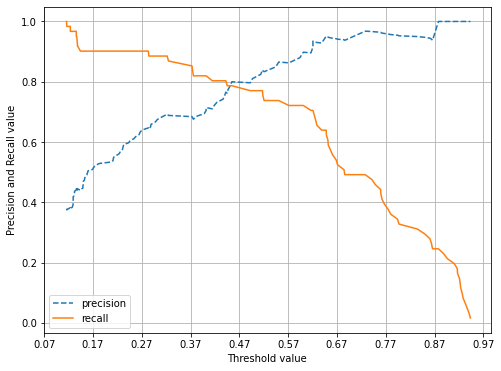

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # precision_recall_curve()는 인수로 test_target 데이터 셋과 positive 예측확률 값을 인자로 넣어주면
    # 거기에 따른 정밀도, 재현율, 분류임계값 nd.array를 반환합니다.
    precision, recalls, thresholds= precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1])

# F1 score

In [16]:
# 위에서 구한 pred를 이용해서 f1 score의 값을 구해봅니다.

from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("F1 Score : {0: 0.4f}".format(f1))

F1 Score :  0.7966


In [17]:
# 위에서 분류평가지표를 동시에 구해주는 get_clf_eval()에 f1 score를 추가합니다.

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)  # f1 스코어 추가
    print('Confusion Matrix')
    print(confusion)
    print("정확도: {0: 0.4f}, 정밀도: {1: 0.4f}, 재현율: {2: 0.4f}, f1 socre:{3: 0.4f}".format(accuracy, precision, recall, f1))

In [18]:
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
Confusion Matrix
[[97 21]
 [11 50]]
정확도:  0.8212, 정밀도:  0.7042, 재현율:  0.8197, f1 socre: 0.7576
 
임곗값: 0.45
Confusion Matrix
[[105  13]
 [ 13  48]]
정확도:  0.8547, 정밀도:  0.7869, 재현율:  0.7869, f1 socre: 0.7869
 
임곗값: 0.5
Confusion Matrix
[[108  10]
 [ 14  47]]
정확도:  0.8659, 정밀도:  0.8246, 재현율:  0.7705, f1 socre: 0.7966
 
임곗값: 0.55
Confusion Matrix
[[111   7]
 [ 16  45]]
정확도:  0.8715, 정밀도:  0.8654, 재현율:  0.7377, f1 socre: 0.7965
 
임곗값: 0.6
Confusion Matrix
[[113   5]
 [ 17  44]]
정확도:  0.8771, 정밀도:  0.8980, 재현율:  0.7213, f1 socre: 0.8000
 


# ROC 커브와 AUC 스코어

In [19]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


In [20]:
thresholds[:5]

array([1.94326279, 0.94326279, 0.94040085, 0.93261004, 0.87778554])

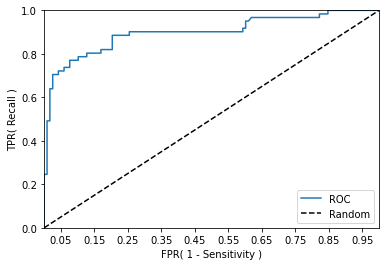

In [21]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [22]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print("AUC 값 : {0:0.4f}".format(roc_score))

AUC 값 : 0.8987


In [27]:
# 위에서 분류평가지표를 동시에 구해주는 get_clf_eval()에 AUC 스코어를 추가합니다.

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)  
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("정확도: {0: 0.4f}, 정밀도: {1: 0.4f}, 재현율: {2: 0.4f}, f1 socre:{3: 0.4f}, AUC{4:0.4f}".format(accuracy, precision, recall, f1,roc_auc))